In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.optimizers import Adam

In [2]:
df = pd.read_csv("/Users/user/Downloads/DSA_features.csv")

In [3]:
df

,T_xacc_mean,T_xacc_max,T_xacc_min,T_xacc_var,T_xacc_std,T_xacc_skew,T_yacc_mean,T_yacc_max,T_yacc_min,T_yacc_var,...,LL_ymag_std,LL_ymag_skew,LL_zmag_mean,LL_zmag_max,LL_zmag_min,LL_zmag_var,LL_zmag_std,LL_zmag_skew,activity,people
0,7.975714,8.1605,7.6823,0.014395,0.119981,-0.023319,1.083150,1.1832,0.99744,0.002208,...,0.000792,0.177075,-0.057119,-0.054963,-0.059241,6.778722e-07,0.000823,0.036729,sitting,p1
1,7.978250,8.1763,7.8472,0.007551,0.086896,0.552416,1.140865,1.2129,1.05810,0.000784,...,0.000860,-0.286918,-0.057268,-0.054945,-0.059589,7.032302e-07,0.000839,0.347471,sitting,p1
2,7.970894,8.0860,7.8470,0.003092,0.055603,0.100538,1.140962,1.2128,1.07960,0.000508,...,0.000762,-0.134430,-0.057068,-0.054711,-0.059065,6.268222e-07,0.000792,0.045579,sitting,p1
3,7.938412,8.1083,7.6901,0.003763,0.061343,-0.231914,1.165260,1.3170,1.07870,0.002173,...,0.000735,0.021485,-0.056422,-0.053670,-0.058310,8.011245e-07,0.000895,0.240690,sitting,p1
4,7.908930,8.1305,7.8322,0.001741,0.041731,2.042285,1.187504,1.2574,1.09450,0.000662,...,0.000824,-0.148229,-0.055801,-0.053313,-0.057815,6.853423e-07,0.000828,0.258429,sitting,p1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9115,8.280854,34.1980,-2.9038,28.080803,5.299132,1.350075,-1.491537,11.2240,-11.65100,14.670334,...,0.200829,-0.040701,0.297666,0.708480,-0.117430,4.135451e-02,0.203358,-0.310022,basketBall,p8
9116,9.591118,51.6970,-3.4129,35.722025,5.976791,2.981144,0.086304,6.9951,-11.76400,5.329897,...,0.148745,-0.266377,0.224716,0.554670,-0.250950,3.355704e-02,0.183186,-0.736410,basketBall,p8
9117,9.599113,27.9300,-1.0765,48.850886,6.989341,0.449237,-0.728367,3.7801,-8.36910,5.683022,...,0.310748,-0.009505,-0.237786,0.088854,-0.477260,2.026107e-02,0.142341,0.668438,basketBall,p8
9118,9.692482,72.7820,-2.6734,59.378336,7.705734,4.491114,-0.582724,6.1216,-8.85710,4.162963,...,0.156493,0.050624,0.533023,0.677800,0.055941,1.356379e-02,0.116464,-1.482489,basketBall,p8


In [4]:
df.isnull().values.any()


False

In [5]:
df.columns

Index(['T_xacc_mean', 'T_xacc_max', 'T_xacc_min', 'T_xacc_var', 'T_xacc_std',
       'T_xacc_skew', 'T_yacc_mean', 'T_yacc_max', 'T_yacc_min', 'T_yacc_var',
       ...
       'LL_ymag_std', 'LL_ymag_skew', 'LL_zmag_mean', 'LL_zmag_max',
       'LL_zmag_min', 'LL_zmag_var', 'LL_zmag_std', 'LL_zmag_skew', 'activity',
       'people'],
      dtype='object', length=272)

In [6]:
df['activity'].value_counts()

activity
sitting                    480
walkingTreadmillIncline    480
jumping                    480
rowing                     480
cyclingVertical            480
cyclingHorizontal          480
crossTrainer               480
stepper                    480
runningTreadmill           480
walkingTreadmillFlat       480
standing                   480
walkingLot                 480
movingInElevator           480
standingInElevatorStill    480
decendingStairs            480
ascendingStairs            480
lyingRigh                  480
lyingBack                  480
basketBall                 480
Name: count, dtype: int64

In [7]:
# 1. DSA데이터에서 sitting(normal) jumping(abnormal)만 남김

df_filtered = df[df['activity'].isin(['sitting', 'jumping'])]
df_filtered = df_filtered.drop('people', axis=1)
df_filtered.head()

,T_xacc_mean,T_xacc_max,T_xacc_min,T_xacc_var,T_xacc_std,T_xacc_skew,T_yacc_mean,T_yacc_max,T_yacc_min,T_yacc_var,...,LL_ymag_var,LL_ymag_std,LL_ymag_skew,LL_zmag_mean,LL_zmag_max,LL_zmag_min,LL_zmag_var,LL_zmag_std,LL_zmag_skew,activity
0,7.975714,8.1605,7.6823,0.014395,0.119981,-0.023319,1.083150,1.1832,0.99744,0.002208,...,6.267229e-07,0.000792,0.177075,-0.057119,-0.054963,-0.059241,6.778722e-07,0.000823,0.036729,sitting
1,7.978250,8.1763,7.8472,0.007551,0.086896,0.552416,1.140865,1.2129,1.05810,0.000784,...,7.403458e-07,0.000860,-0.286918,-0.057268,-0.054945,-0.059589,7.032302e-07,0.000839,0.347471,sitting
2,7.970894,8.0860,7.8470,0.003092,0.055603,0.100538,1.140962,1.2128,1.07960,0.000508,...,5.802523e-07,0.000762,-0.134430,-0.057068,-0.054711,-0.059065,6.268222e-07,0.000792,0.045579,sitting
3,7.938412,8.1083,7.6901,0.003763,0.061343,-0.231914,1.165260,1.3170,1.07870,0.002173,...,5.398837e-07,0.000735,0.021485,-0.056422,-0.053670,-0.058310,8.011245e-07,0.000895,0.240690,sitting
4,7.908930,8.1305,7.8322,0.001741,0.041731,2.042285,1.187504,1.2574,1.09450,0.000662,...,6.787533e-07,0.000824,-0.148229,-0.055801,-0.053313,-0.057815,6.853423e-07,0.000828,0.258429,sitting


In [8]:
from sklearn.preprocessing import LabelEncoder

# LabelEncoder 객체 생성
label_encoder = LabelEncoder()

# 'label' 컬럼을 숫자로 변환
df_filtered['activity'] = label_encoder.fit_transform(df_filtered['activity'])



df_filtered.head()

,T_xacc_mean,T_xacc_max,T_xacc_min,T_xacc_var,T_xacc_std,T_xacc_skew,T_yacc_mean,T_yacc_max,T_yacc_min,T_yacc_var,...,LL_ymag_var,LL_ymag_std,LL_ymag_skew,LL_zmag_mean,LL_zmag_max,LL_zmag_min,LL_zmag_var,LL_zmag_std,LL_zmag_skew,activity
0,7.975714,8.1605,7.6823,0.014395,0.119981,-0.023319,1.083150,1.1832,0.99744,0.002208,...,6.267229e-07,0.000792,0.177075,-0.057119,-0.054963,-0.059241,6.778722e-07,0.000823,0.036729,1
1,7.978250,8.1763,7.8472,0.007551,0.086896,0.552416,1.140865,1.2129,1.05810,0.000784,...,7.403458e-07,0.000860,-0.286918,-0.057268,-0.054945,-0.059589,7.032302e-07,0.000839,0.347471,1
2,7.970894,8.0860,7.8470,0.003092,0.055603,0.100538,1.140962,1.2128,1.07960,0.000508,...,5.802523e-07,0.000762,-0.134430,-0.057068,-0.054711,-0.059065,6.268222e-07,0.000792,0.045579,1
3,7.938412,8.1083,7.6901,0.003763,0.061343,-0.231914,1.165260,1.3170,1.07870,0.002173,...,5.398837e-07,0.000735,0.021485,-0.056422,-0.053670,-0.058310,8.011245e-07,0.000895,0.240690,1
4,7.908930,8.1305,7.8322,0.001741,0.041731,2.042285,1.187504,1.2574,1.09450,0.000662,...,6.787533e-07,0.000824,-0.148229,-0.055801,-0.053313,-0.057815,6.853423e-07,0.000828,0.258429,1


In [56]:
# LSTM, CNN과 같은 딥러닝 모델에서 입력 데이터가 다양한 범위를 가질 때, 피처 스케일링은 필수적입니다.

from sklearn.preprocessing import StandardScaler

# StandardScaler 객체 생성
scaler = StandardScaler()

# 열 이름의 접두사/접미사를 사용하여 필터링
prefixes = ['T_', 'RA_', 'LA_', 'RL_', 'LL_']  # 원하는 접두사 리스트
columns_to_scale = df_filtered.columns[df_filtered.columns.str.startswith(tuple(prefixes))]

# 선택한 열을 스케일링
df_filtered[columns_to_scale] = scaler.fit_transform(df_filtered[columns_to_scale])

# 스케일링 후 데이터 확인
df_filtered.head()

,T_xacc_mean,T_xacc_max,T_xacc_min,T_xacc_var,T_xacc_std,T_xacc_skew,T_yacc_mean,T_yacc_max,T_yacc_min,T_yacc_var,...,LL_ymag_var,LL_ymag_std,LL_ymag_skew,LL_zmag_mean,LL_zmag_max,LL_zmag_min,LL_zmag_var,LL_zmag_std,LL_zmag_skew,activity
0,-0.991082,-0.915891,0.880442,-0.792381,-0.915618,-0.693959,1.970595,-0.137287,1.163180,-0.661412,...,-0.525643,-0.842368,0.068442,-0.830050,-0.985256,-0.710550,-0.363086,-0.718711,-0.092075,1
1,-0.988048,-0.914984,0.900648,-0.792458,-0.921024,0.170972,2.028320,-0.128928,1.175725,-0.661756,...,-0.525599,-0.839893,-0.987138,-0.830446,-0.985206,-0.711441,-0.363077,-0.718108,0.453045,1
2,-0.996852,-0.920168,0.900623,-0.792508,-0.926138,-0.507888,2.028418,-0.128956,1.180171,-0.661823,...,-0.525661,-0.843445,-0.640229,-0.829916,-0.984551,-0.710099,-0.363105,-0.719958,-0.076549,1
3,-1.035725,-0.918888,0.881398,-0.792501,-0.925200,-1.007332,2.052721,-0.099626,1.179985,-0.661421,...,-0.525677,-0.844416,-0.285526,-0.828197,-0.981638,-0.708166,-0.363041,-0.715879,0.265724,1
4,-1.071009,-0.917614,0.898810,-0.792524,-0.928405,2.409210,2.074969,-0.116402,1.183253,-0.661786,...,-0.525623,-0.841209,-0.671621,-0.826544,-0.980639,-0.706898,-0.363083,-0.718532,0.296842,1


In [10]:
df_filtered['activity'].value_counts()

activity
1    480
0    480
Name: count, dtype: int64

In [11]:
LABELS = ["Normal", "Abnormal"]

In [12]:
normal = df_filtered[df_filtered.activity == 1] # sitting
abnormal = df_filtered[df_filtered.activity == 0] # jumping
normal.shape

(480, 271)

In [13]:
abnormal.shape

(480, 271)

In [14]:
# 2. 두개 activity를 섞어서 training / test 

from sklearn.model_selection import train_test_split

X_train, X_test = train_test_split(df_filtered, test_size=0.2, random_state=20)

X_train.head()

,T_xacc_mean,T_xacc_max,T_xacc_min,T_xacc_var,T_xacc_std,T_xacc_skew,T_yacc_mean,T_yacc_max,T_yacc_min,T_yacc_var,...,LL_ymag_var,LL_ymag_std,LL_ymag_skew,LL_zmag_mean,LL_zmag_max,LL_zmag_min,LL_zmag_var,LL_zmag_std,LL_zmag_skew,activity
8502,-1.399320,0.933208,-0.951926,0.173058,0.576063,1.192118,-0.844263,0.499516,-2.241638,1.852266,...,4.191600,3.100760,1.516530,-1.239611,-0.831448,-1.388501,3.867175,3.516618,2.206089,0
8224,1.518346,0.169053,-1.005876,-0.352990,0.084432,0.223105,0.568812,0.355177,0.380889,-0.485699,...,-0.084484,0.344011,-0.845727,0.677580,0.769768,0.486653,-0.085773,0.341962,-2.157263,0
8270,1.035318,0.451291,-1.448637,-0.116634,0.329198,0.055494,0.909729,0.487948,0.194469,-0.368414,...,0.151437,0.634051,-1.419694,0.714286,0.818320,0.419964,0.222189,0.836539,-2.563057,0
440,-1.292832,-0.937513,0.877698,-0.792535,-0.930834,-0.810303,0.595534,-0.515899,0.876678,-0.661516,...,-0.508950,-0.632889,-0.199278,0.303684,0.259256,0.298418,-0.343028,-0.455550,-1.388333,1
8401,0.265671,0.714353,-0.718275,1.157590,1.212508,0.770582,0.100941,-0.207593,0.163613,-0.366585,...,-0.156206,0.240939,0.180776,0.080901,0.044759,0.103012,-0.307237,-0.259770,0.036078,0


In [15]:
# 3. training를 다시 training/valid

X_train, X_valid = train_test_split(X_train, test_size=0.25, random_state=21)

X_valid.head()

,T_xacc_mean,T_xacc_max,T_xacc_min,T_xacc_var,T_xacc_std,T_xacc_skew,T_yacc_mean,T_yacc_max,T_yacc_min,T_yacc_var,...,LL_ymag_var,LL_ymag_std,LL_ymag_skew,LL_zmag_mean,LL_zmag_max,LL_zmag_min,LL_zmag_var,LL_zmag_std,LL_zmag_skew,activity
342,-0.906081,-0.901619,0.906308,-0.792426,-0.918581,0.872794,0.645938,-0.497295,0.886258,-0.661420,...,-0.525650,-0.842779,-0.576752,0.104825,-0.002982,0.190087,-0.363167,-0.724581,-0.644366,1
8167,0.718878,1.267633,-0.978515,0.987382,1.116641,0.521145,0.588184,0.875620,-0.602021,0.052334,...,-0.181252,0.202616,0.135593,-1.611961,-1.655128,-1.598479,-0.167878,0.166135,-0.661820,0
8400,0.481446,0.654817,-0.779245,0.739701,0.968535,0.716849,0.101630,-0.222458,-0.046672,-0.423544,...,0.466181,0.950447,0.016087,0.037867,0.005161,0.027641,-0.229221,0.008667,-1.307584,0
177,0.213258,-0.862418,1.018337,-0.792527,-0.928979,-1.719059,-0.923684,-0.908804,0.503093,-0.660584,...,-0.525595,-0.839673,0.188666,0.605604,0.523649,0.671994,-0.363125,-0.721424,-0.508168,1
8508,-1.598600,1.223771,-0.815747,0.422808,0.760280,1.650998,-0.717189,0.626770,-2.508424,2.385695,...,3.920321,2.984875,1.046871,-1.313356,-0.831448,-1.539959,5.256993,4.167955,1.993160,0


In [16]:
# 4. train/valid에서 jumping 데이터를 삭제 (sitting을 정상데이터로 사용)

# sitting feature 만 받음
X_train = X_train[X_train.activity == 1]
X_valid = X_valid[X_valid.activity == 1]

# y 라벨 값 
y_train = X_train['activity']
y_vaild = X_valid['activity']

# drop
X_train = X_train.drop(['activity'], axis=1)
X_valid = X_valid.drop(['activity'], axis=1)

X_train



,T_xacc_mean,T_xacc_max,T_xacc_min,T_xacc_var,T_xacc_std,T_xacc_skew,T_yacc_mean,T_yacc_max,T_yacc_min,T_yacc_var,...,LL_ymag_min,LL_ymag_var,LL_ymag_std,LL_ymag_skew,LL_zmag_mean,LL_zmag_max,LL_zmag_min,LL_zmag_var,LL_zmag_std,LL_zmag_skew
371,0.609285,-0.842570,1.068158,-0.792522,-0.928174,-0.324211,-0.930253,-0.944860,0.562158,-0.661540,...,0.658925,-0.525653,-0.842949,-0.225292,1.194416,1.142011,1.239234,-0.363155,-0.723678,0.170954
82,0.864095,-0.816482,1.052621,-0.792316,-0.912040,-1.996832,-0.127854,-0.313447,0.502824,-0.570808,...,0.892079,-0.485837,-0.504918,-4.792976,1.020663,1.022911,1.050077,-0.344112,-0.463550,2.455565
455,-1.320757,-0.937754,0.873838,-0.792535,-0.930850,0.191588,0.460947,-0.558584,0.854682,-0.661582,...,0.246940,-0.497735,-0.564055,0.222497,0.292216,0.246579,0.304718,-0.340320,-0.436448,-1.032809
54,-1.173923,-0.928763,0.889620,-0.792522,-0.928166,0.668675,2.398295,-0.023826,1.252617,-0.661805,...,0.244110,-0.525567,-0.838194,-0.628798,-0.828664,-0.984128,-0.709428,-0.363079,-0.718265,0.175017
389,0.096440,-0.865903,1.012811,-0.792516,-0.927134,-0.054345,-1.111651,-0.997524,0.517280,-0.661380,...,0.592609,-0.525631,-0.841646,-0.624872,1.216079,1.167588,1.258928,-0.363146,-0.722932,0.030727
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
384,0.691596,-0.833183,1.066271,-0.792496,-0.924695,-0.099058,-0.962105,-0.882402,0.543938,-0.660843,...,0.651808,-0.525681,-0.844656,-0.081153,1.193486,1.140220,1.238030,-0.363186,-0.726231,-0.215088
307,-0.769787,-0.905190,0.921588,-0.792492,-0.924208,-0.055846,0.379212,-0.581837,0.836404,-0.661513,...,1.315942,-0.525681,-0.844666,-0.559294,-0.472346,-0.609638,-0.364697,-0.363134,-0.722035,-0.149407
149,0.209374,-0.864886,1.027723,-0.792537,-0.931219,-1.374170,-0.672795,-0.886793,0.612455,-0.661644,...,1.135067,-0.517088,-0.699340,-0.558396,0.634039,0.557117,0.694275,-0.362100,-0.678383,-0.300650
44,-1.175435,-0.919336,0.872196,-0.792448,-0.920181,-0.505011,2.351658,-0.038321,1.246744,-0.661756,...,0.239572,-0.525587,-0.839237,-0.887939,-0.829867,-0.985875,-0.710363,-0.363111,-0.720439,-0.579142


In [17]:
y_test = X_test['activity']
X_test = X_test.drop(['activity'], axis=1)

X_test

,T_xacc_mean,T_xacc_max,T_xacc_min,T_xacc_var,T_xacc_std,T_xacc_skew,T_yacc_mean,T_yacc_max,T_yacc_min,T_yacc_var,...,LL_ymag_min,LL_ymag_var,LL_ymag_std,LL_ymag_skew,LL_zmag_mean,LL_zmag_max,LL_zmag_min,LL_zmag_var,LL_zmag_std,LL_zmag_skew
197,0.560722,-0.847307,1.066197,-0.792537,-0.931392,-0.134177,-0.717696,-0.912153,0.615288,-0.661884,...,0.626397,-0.525138,-0.820860,-1.226455,0.834880,0.765402,0.891063,-0.363003,-0.713604,-0.598497
316,-0.692293,-0.905155,0.932615,-0.792504,-0.925581,-0.384700,0.410005,-0.575701,0.839504,-0.661599,...,1.315746,-0.525719,-0.847230,-0.612436,-0.463141,-0.599472,-0.356225,-0.363164,-0.724392,0.181489
8316,1.124342,0.204304,-0.353994,-0.352227,0.085317,0.538789,0.266635,0.178300,-1.681801,0.293766,...,-1.736329,0.463386,0.947880,1.417371,-1.619936,-1.518231,-1.645755,0.149587,0.734846,1.515531
444,-1.323304,-0.936083,0.868251,-0.792529,-0.929305,-0.866602,0.387709,-0.542141,0.823334,-0.661342,...,0.245315,-0.499977,-0.576524,-0.015879,0.278833,0.242689,0.278903,-0.333630,-0.393607,-0.657233
8313,0.962852,0.472936,-0.436481,-0.101088,0.343656,0.450699,0.292733,0.622661,0.175670,-0.369513,...,-1.686768,0.186553,0.672569,1.209863,-1.655987,-1.493885,-1.695413,0.444474,1.113727,1.307035
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8245,1.095842,0.149820,-1.490542,-0.254245,0.193166,-0.280953,0.576990,0.596765,0.379772,-0.474216,...,-1.724114,-0.233819,0.117361,0.129539,0.645234,0.690937,0.495975,-0.076890,0.359317,-1.861408
8435,0.782290,0.880389,-1.035688,1.643730,1.465327,0.685916,0.007953,0.001676,-0.042598,-0.291819,...,-0.131341,0.281015,0.771707,-0.423430,0.128989,0.113431,0.120043,-0.274331,-0.132186,-0.535104
8535,0.342123,1.946933,-1.576190,2.126622,1.692485,1.081649,0.720129,5.085381,-0.940053,3.272001,...,-1.112007,1.668301,1.837768,-1.237715,-1.611405,-1.493017,-1.632463,0.154982,0.742641,1.103349
202,0.562544,-0.846888,1.063428,-0.792532,-0.930022,-0.704556,-0.694851,-0.904300,0.616529,-0.661852,...,0.618160,-0.525624,-0.841238,-0.139770,0.829535,0.758518,0.888477,-0.363177,-0.725420,0.007406


In [18]:
# X_train과 X_test를 넘파이 배열로 변환
X_train = X_train.values
X_test = X_test.values

X_train

array([[ 0.60928508, -0.84257024,  1.06815772, ..., -0.36315535,
        -0.72367795,  0.17095404],
       [ 0.86409482, -0.81648219,  1.05262096, ..., -0.34411224,
        -0.46355006,  2.45556497],
       [-1.32075733, -0.93775371,  0.87383804, ..., -0.3403202 ,
        -0.43644847, -1.0328088 ],
       ...,
       [ 0.20937351, -0.86488631,  1.02772295, ..., -0.36209958,
        -0.67838345, -0.30065044],
       [-1.1754353 , -0.91933592,  0.87219614, ..., -0.36311149,
        -0.72043853, -0.57914165],
       [ 1.12676976, -0.82233248,  1.1241905 , ..., -0.3631285 ,
        -0.72165268, -0.45038361]])

In [19]:
# 5. AE로 valid를 목표로 training을 학습 

# 오토인코더 모델

input_dim = X_train.shape[1]
encoding_dim = 16  # 인코딩 차원을 설정 (임의로 설정한 값, 조정 가능)

input_layer = Input(shape=(input_dim,))
encoded = Dense(encoding_dim, activation='relu')(input_layer)
encoded = Dense(int(encoding_dim / 2), activation='relu')(encoded)
decoded = Dense(int(encoding_dim / 2), activation='relu')(encoded)
decoded = Dense(input_dim, activation='sigmoid')(decoded)

autoencoder = Model(inputs=input_layer, outputs=decoded)
autoencoder.compile(optimizer=Adam(learning_rate=0.001), loss='mse')
autoencoder.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 270)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 16)             │         4,336 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 8)              │           136 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 8)              │            72 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 270)            │         2,430 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 6,974 (27.24 KB)

 Trainable params: 6,974 (27.24 KB)

 Non-trainable params: 0 (0.00 B)

In [20]:
# 3. 모델 학습
# 훈련데이터의 0.1 을 validation data로 사용
history = autoencoder.fit(X_train, X_train, 
                          epochs=50, 
                          batch_size=256, 
                          shuffle=True, 
                          validation_split = 0.1)

Epoch 1/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 437ms/step - loss: 1.1624 - val_loss: 1.1218
Epoch 2/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 1.1607 - val_loss: 1.1206
Epoch 3/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 1.1594 - val_loss: 1.1194
Epoch 4/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 1.1581 - val_loss: 1.1182
Epoch 5/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 1.1567 - val_loss: 1.1167
Epoch 6/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 1.1551 - val_loss: 1.1151
Epoch 7/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 1.1533 - val_loss: 1.1131
Epoch 8/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 1.1511 - val_loss: 1.1108
Epoch 9/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 1.1486 - val_loss: 1.1081
Epoch 10/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 1.1457 - val_loss: 1.1050
Epoch 11/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 1.1424 - val_loss: 1.1015
Epoch 12/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 1.1386 - val_loss: 1.0973


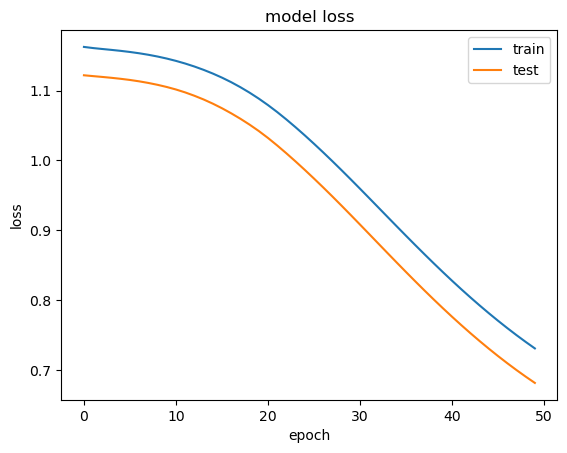

In [21]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right');

In [22]:
# X_test 값을 넣어서 Reconstruction Error 값을 얻고,
# 실제 레이블인 y_test와 데이터프레임으로 구성
# Reconstruction Error + 실제 레이블의 형태가 됨

predictions = autoencoder.predict(X_test)
mse = np.mean(np.power(X_test - predictions, 2), axis=1)
error_df = pd.DataFrame({'reconstruction_error': mse,
                        'true_class': y_test})
error_df.describe()

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 513us/step


,reconstruction_error,true_class
count,192.000000,192.000000
mean,0.953286,0.552083
std,0.598013,0.498580
min,0.501408,0.000000
25%,0.600702,0.000000
50%,0.666523,1.000000
75%,0.961868,1.000000
max,3.458352,1.000000


In [23]:
error_df = error_df.reset_index(drop=True)
error_df

,reconstruction_error,true_class
0,0.629280,1
1,0.587541,1
2,1.575387,0
3,1.692858,1
4,1.767785,0
...,...,...
187,0.787403,0
188,0.612580,0
189,2.746491,0
190,0.613138,1


In [24]:
error_df.head()

,reconstruction_error,true_class
0,0.629280,1
1,0.587541,1
2,1.575387,0
3,1.692858,1
4,1.767785,0


In [25]:
# threshold 값을 조정하여 최선의 정확도를 얻음, 그래프로를 보고 결정

threshold = 0.7

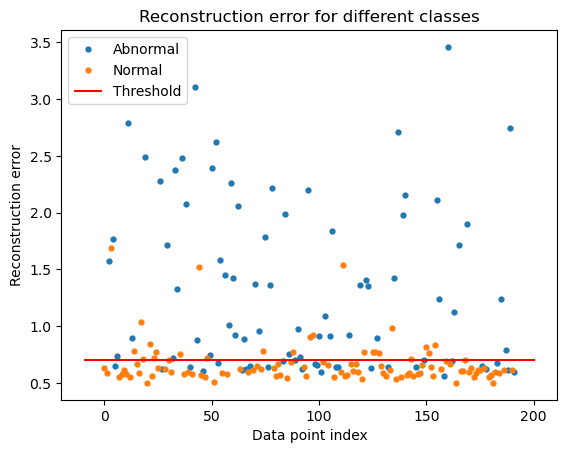

In [26]:
groups = error_df.groupby('true_class')
fig, ax = plt.subplots()

for name, group in groups:
    ax.plot(group.index, group.reconstruction_error, marker='o', ms=3.5, linestyle='',
            label= "Normal" if name == 1 else "Abnormal")
ax.hlines(threshold, ax.get_xlim()[0], ax.get_xlim()[1], colors="r", zorder=100, label='Threshold')
ax.legend()
plt.title("Reconstruction error for different classes")
plt.ylabel("Reconstruction error")
plt.xlabel("Data point index")
plt.show();

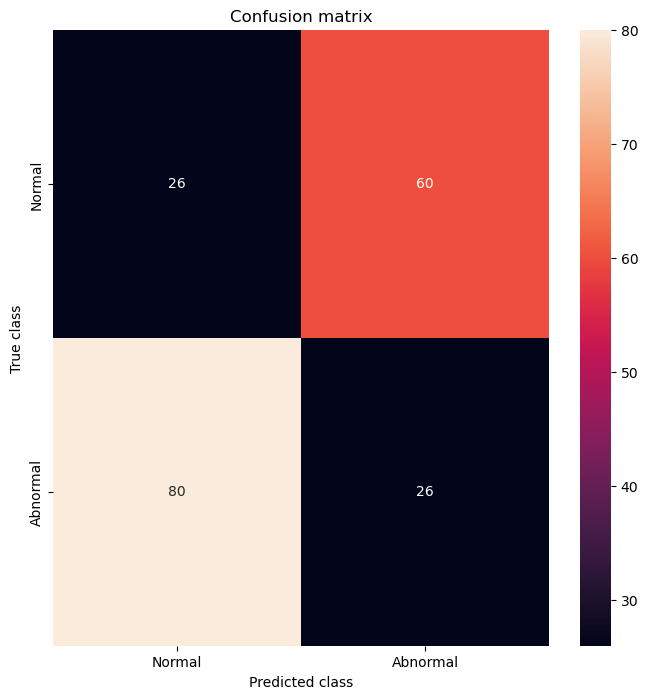

              precision    recall  f1-score   support

           0       0.25      0.30      0.27        86
           1       0.30      0.25      0.27       106

    accuracy                           0.27       192
   macro avg       0.27      0.27      0.27       192
weighted avg       0.28      0.27      0.27       192



In [27]:

from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns

y_pred = [1 if e > threshold else 0 for e in error_df.reconstruction_error.values]
conf_matrix = confusion_matrix(error_df.true_class, y_pred)
plt.figure(figsize=(8, 8))
sns.heatmap(conf_matrix, xticklabels=LABELS, yticklabels=LABELS, annot=True, fmt="d");
plt.title("Confusion matrix")
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.show()

print(classification_report(error_df.true_class, y_pred))